In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
company_data = pd.read_csv("C:/Users/Hp/Desktop/rworkspace/assingments/decision_trees/Company_Data.csv")

In [4]:
#understanding the data
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [3]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
company_data.shape

(400, 11)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
#transformimg the values into numerical values
company_data['ShelveLoc'] = le.fit_transform(company_data['ShelveLoc'])
company_data['Urban'] = le.fit_transform(company_data['Urban'])
company_data['US'] = le.fit_transform(company_data['US'])

In [7]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [11]:
#dividing data into input and output 
X = company_data.drop(labels = 'ShelveLoc', axis = 1)
y = company_data[['ShelveLoc']]

In [12]:
company_data.ShelveLoc.unique()

array([0, 1, 2])

In [14]:
company_data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [15]:
#Divide data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=12)

In [16]:
X_train.shape, y_train.shape

((320, 10), (320, 1))

In [17]:
X_test.shape, y_test.shape

((80, 10), (80, 1))

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [20]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = {'criterion':['entropy','gini'],
                                         'max_depth':[2,3,4,5,6,7,8,9,10]},
                           cv=5)
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 4}
0.6225


In [21]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=4)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [22]:
y_pred_train = dt_model.predict(X_train)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
accuracy_score(y_train, y_pred_train)

0.73125

In [25]:
y_pred_test = dt_model.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred_test)

0.6375

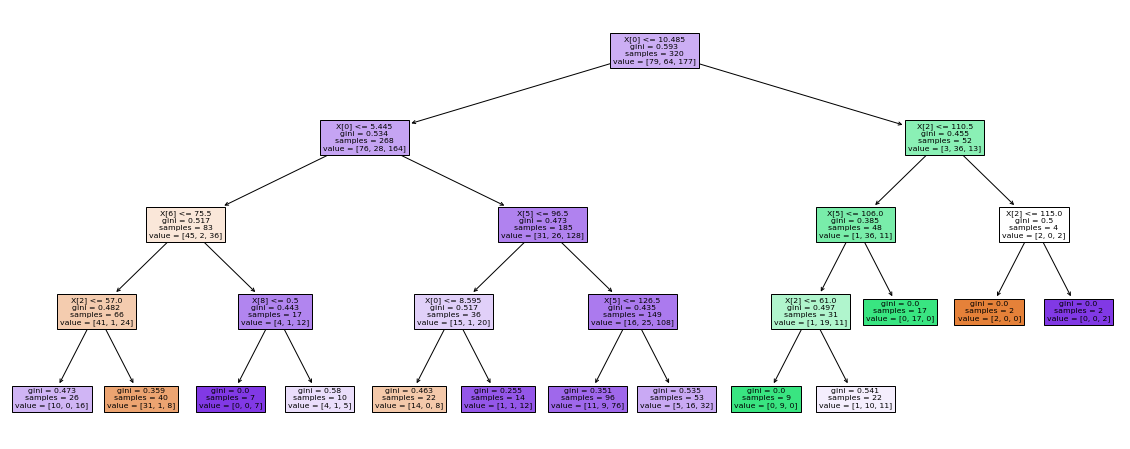

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize =(20,8))
plot_tree(decision_tree = dt_model, filled = True)
plt.show()

In [36]:
feature_list = list(company_data.columns)
feature_list
features = np.array(company_data)
features

array([[  9.5 , 138.  ,  73.  , ...,  17.  ,   1.  ,   1.  ],
       [ 11.22, 111.  ,  48.  , ...,  10.  ,   1.  ,   1.  ],
       [ 10.06, 113.  ,  35.  , ...,  12.  ,   1.  ,   1.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,  18.  ,   1.  ,   1.  ],
       [  5.94, 100.  ,  79.  , ...,  12.  ,   1.  ,   1.  ],
       [  9.71, 134.  ,  37.  , ...,  16.  ,   1.  ,   1.  ]])

In [38]:
importances = list(dt_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Sales                Importance: 0.58
Variable: Income               Importance: 0.2
Variable: Price                Importance: 0.14
Variable: ShelveLoc            Importance: 0.05
Variable: Education            Importance: 0.02
Variable: CompPrice            Importance: 0.0
Variable: Advertising          Importance: 0.0
Variable: Population           Importance: 0.0
Variable: Age                  Importance: 0.0
Variable: Urban                Importance: 0.0
